In [13]:
#Load and Explore the Dataset
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r"C:\Users\MADHU\Desktop\Global_Superstore.csv",encoding='ISO-8859-1')

# Check the first few rows
print(df.head())

# Get dataset info (data types, missing values, etc.)
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   Row ID         Order ID        Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology 

In [14]:
#Data Cleaning
#Remove Duplicates
df.drop_duplicates(inplace=True)


In [15]:
#Fill Missing Values
#Numerical columns (e.g., Sales, Profit) → Fill with mean or median
df['Sales'].fillna(df['Sales'].median(), inplace=True)
df['Profit'].fillna(df['Profit'].median(), inplace=True)


In [16]:
#Categorical columns (e.g., Region, Category) → Fill with mode or 'Unknown'
df['Region'].fillna(df['Region'].mode()[0], inplace=True)
df['Category'].fillna(df['Category'].mode()[0], inplace=True)


In [17]:
# Convert Date Column to DateTime
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\MADHU\AppData\Local\Temp\ipykernel_7668\3693369917.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


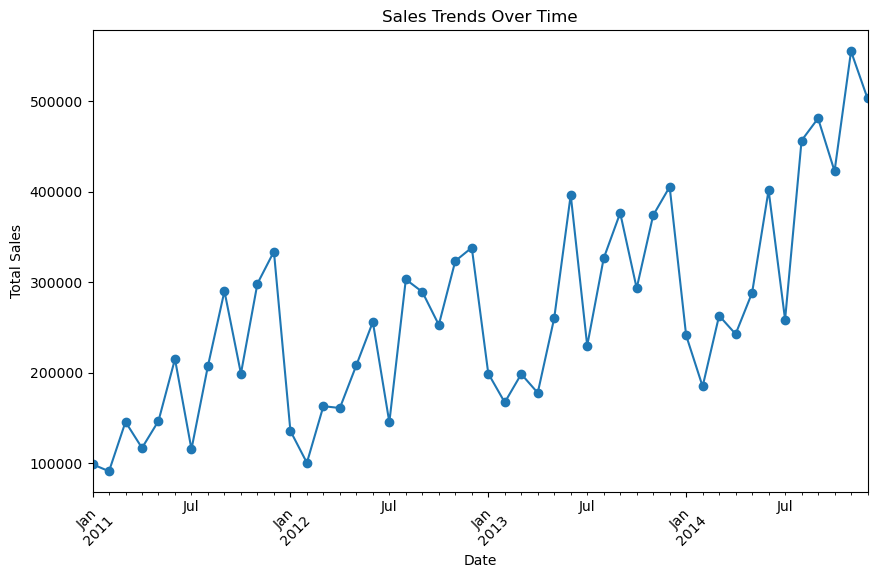

In [18]:
#Exploratory Data Analysis (EDA)
#Time Series Plot for Sales Trends
import matplotlib.pyplot as plt

# Group by date to calculate daily sales
df['Year-Month'] = df['Date'].dt.to_period('M')
sales_trends = df.groupby('Year-Month')['Sales'].sum()

# Plot the time series
plt.figure(figsize=(10, 6))
sales_trends.plot(kind='line', marker='o')
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


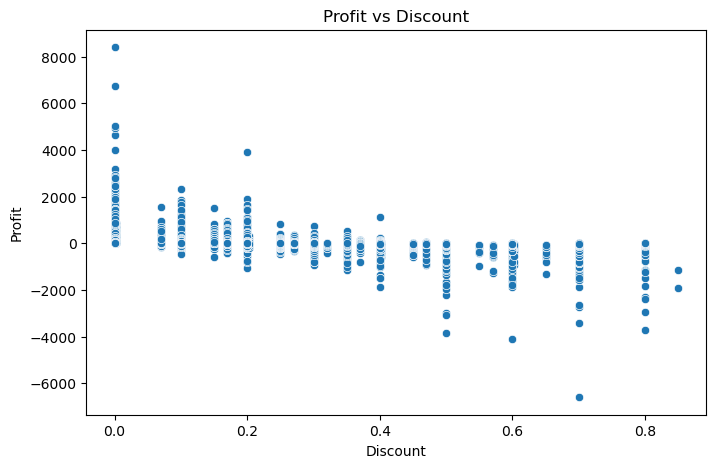

In [19]:
#Scatter Plot: Profit vs. Discount
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


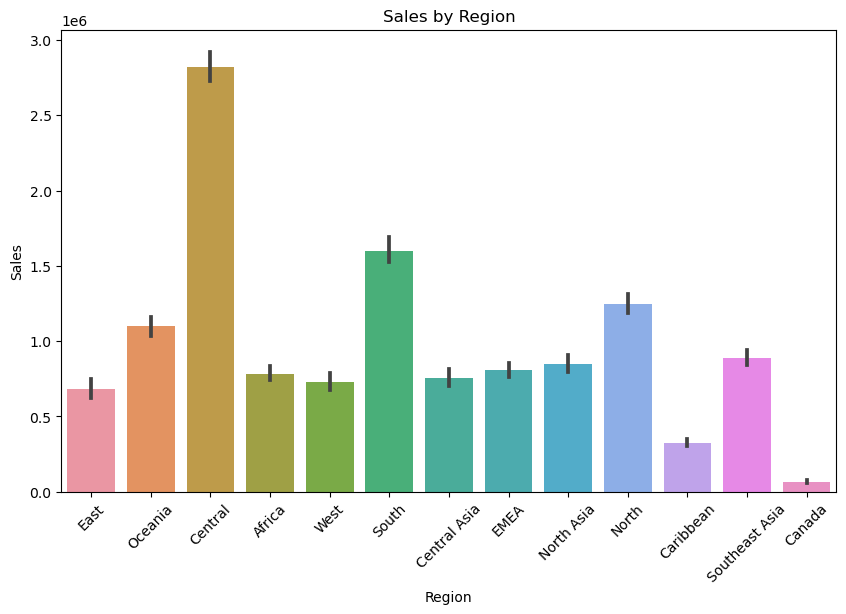

In [9]:
# Bar plot for Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="Sales", data=df, estimator=np.sum)
plt.title("Sales by Region")
plt.xticks(rotation=45)
plt.show()


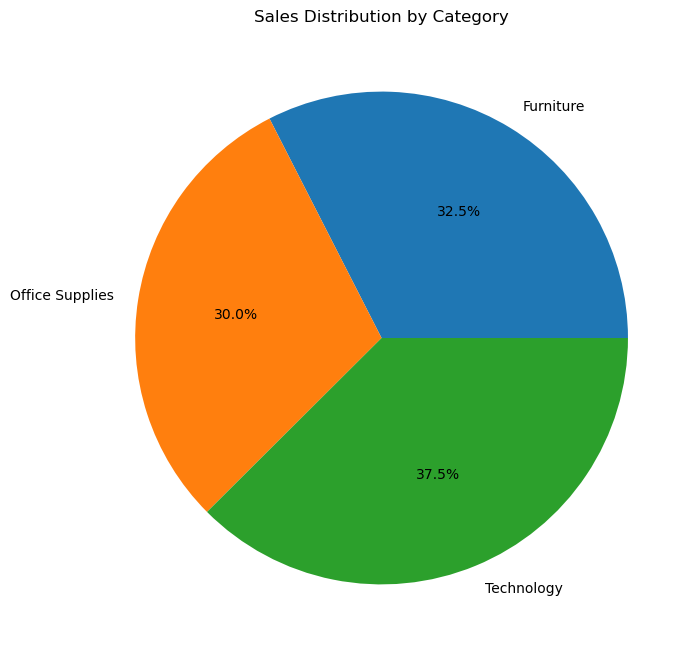

In [10]:
# Pie chart for Sales by Category
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.show()


In [20]:
#Predictive Modeling (Linear Regression)
#Prepare the Data for Modeling

# Select relevant columns for modeling
X = df[['Profit', 'Discount']]  # Features
y = df['Sales']  # Target variable

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
#Train the Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 187787.80150462044
R-squared: 0.16090406163840798
